## Reimplementation of Time-series Generative Adversarial Networks


This tutorial shows how to use TGAN to generate synthetic time-series data. We are using Google Stock and Sine dataset as examples.

### Mount your Drive if you use Google Colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')



Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
%cd drive/My\ Drive/CS591_TimeGAN-master/ #Change according to your directory

/content/drive/My Drive


In [2]:
!pip install tensorflow==1.13.1

[Errno 2] No such file or directory: 'drive/My Drive/CS591_TimeGAN-master #Adjust this according to your directory'
/content
     |████████████████████████████████| 92.5MB 60kB/s 
     |████████████████████████████████| 368kB 37.7MB/s 
     |████████████████████████████████| 3.2MB 47.6MB/s 
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: tensorboard 2.2.1
    Uninstalling tensorboard-2.2.1:
      Successfully uninstalled tensorboard-2.2.1
  Found existing installation: tensorflow 2.2.0rc3
    Uninstalling tensorflow-2.2.0rc3:
      Successfully uninstalled tensorflow-2.2.0rc3


Experiment Settings (Import necessary packages and functions)

In [7]:
import tensorflow as tf
import numpy as np
import sys
#Losses and plots
import matplotlib.pyplot as plt 
import seaborn as sns

#%% Functions
# 1. Models
from tgan import timegan

# 2. Data Loading
from data_load import load_google, generate_sine_data, load_energy 
from test import train_synt_test_real, train_real_test_real
# 3. Metrics
sys.path.append('metrics')
from visualization_metrics import PCA_Analysis, tSNE_Analysis

print('Packages and functions are ready!')


Packages and functions are ready!


Set main parameters and datasets

In [11]:
#%% Main Parameters
# Data
data_set = ['google','sine','energy']
data_name = data_set[0] # Change the dataset from here

# Experiments iterations
Iteration = 1 # Change the number of iterations from here for the whole experiment

#%% Data Loading
seq_length = 24  # Sequence length of the data

if data_name == 'google':
    dataX = load_google(seq_length)
elif data_name == 'sine':
    data_len = 10000  # Number of samples in sine waves
    F_No = 5 # number of waves in one sample
    dataX = generate_sine_data(data_len, seq_length, F_No)
elif data_name == 'energy':
    dataX = load_energy(seq_length)

print(data_name + ' dataset is ready.')


google dataset is ready.


Set network parameters & Output initialization

In [12]:
#%% Newtork Parameters
parameters = dict()
parameters['hidden_dim'] = len(dataX[0][0,:]) * 4 # Change the hidden dimension
parameters['num_layers'] = 3 # Change the number of layers of multi layer RNNs
parameters['iterations'] = 100  # Change the number of iterations for training
parameters['batch_size'] = 128 # Change the batch size
parameters['module_name'] = 'gru'   # Change the cell type 'gru' or 'lstm'
parameters['z_dim'] = len(dataX[0][0,:]) 
print(parameters['z_dim'])
print('Parameters are ' + str(parameters))


6
Parameters are {'hidden_dim': 24, 'num_layers': 3, 'iterations': 100, 'batch_size': 128, 'module_name': 'gru', 'z_dim': 6}


Run TGAN & Evaluate discriminative and predictive scores

In [13]:
# TRAINING
losses = []   
# Each Iteration
for it in range(Iteration):

    # Synthetic Data Generation
    dataX_hat, loss_list = timegan(dataX, parameters)  # Returns to synthetic dataset and stored loss values 
    losses.append(loss_list)  
    print('Finish Synthetic Data Generation') 

data_synt = dataX_hat


Instructions for updating:
This class is equivalent as tf.keras.layers.GRUCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Colocations handled automatically by placer.

For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use tf.cast instead.
step: 0, e_loss: 1.8737
step: 10, e_loss: 1.6971
step: 20, e_loss: 1.6052
step: 30, e_loss: 1.5065
step: 40, e_loss: 1.365
step: 50, e_loss: 1.3088
step: 60, e_loss: 1.2429
step: 70, e_loss: 1.1694
step: 80, e_loss: 1.1268
step: 90, e_l

In [0]:
# Read the losses for plots
loss1 = losses[0]
loss_e = loss1[0]
loss_s = loss1[1]
loss_d = loss1[2]
loss_g_adv = loss1[3]
loss_g_v = loss1[4]
loss_e_joint = loss1[5]
loss_s_joint = loss1[6]
x = np.arange(0,parameters['iterations'],10)
sns.set()

Text(0, 0.5, 'Loss')

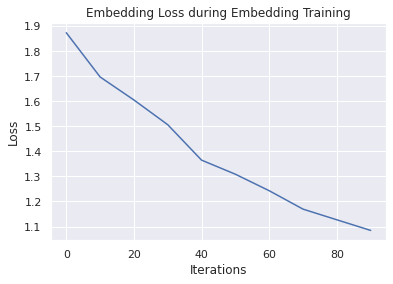

In [18]:
plt.plot(x,loss_e)
plt.title('Embedding Loss during Embedding Training')
plt.xlabel('Iterations')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

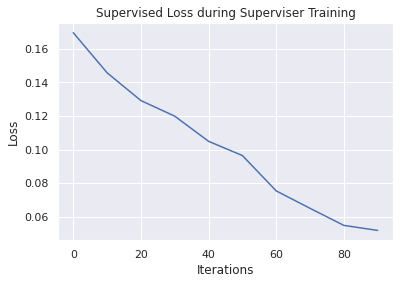

In [19]:
plt.plot(x,loss_s)
plt.title('Supervised Loss during Supervisor Training')
plt.xlabel('Iterations')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

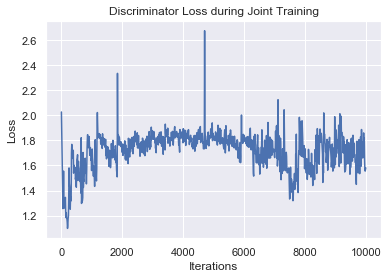

In [0]:
plt.plot(x,loss_d)
plt.title('Discriminator Loss during Joint Training')
plt.xlabel('Iterations')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

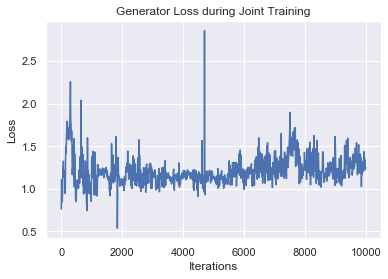

In [0]:
plt.plot(x,loss_g_adv)
plt.title('Generator Loss during Joint Training')
plt.xlabel('Iterations')
plt.ylabel('Loss')

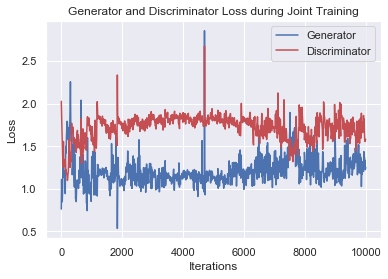

In [0]:
fig=plt.figure()
ax=fig.add_subplot(111)
 
ax.plot(x,loss_g_adv,c='b',label='Generator')
ax.plot(x,loss_d,c='r', label='Discriminator')

plt.title('Generator and Discriminator Loss during Joint Training')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()

Text(0, 0.5, 'Loss')

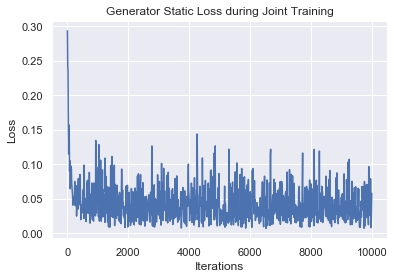

In [0]:
plt.plot(x,loss_g_v)
plt.title('Generator Static Loss during Joint Training')
plt.xlabel('Iterations')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

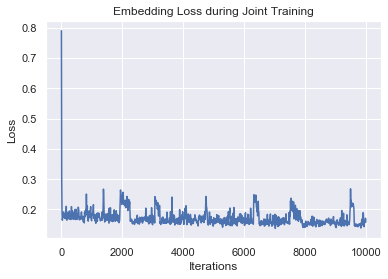

In [0]:
plt.plot(x,loss_e_joint)
plt.title('Embedding Loss during Joint Training')
plt.xlabel('Iterations')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

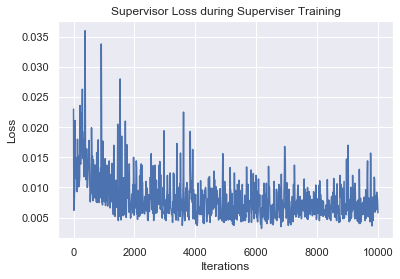

In [0]:
plt.plot(x,loss_s_joint)
plt.title('Supervisor Loss during Superviser Training')
plt.xlabel('Iterations')
plt.ylabel('Loss')

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.006s...
[t-SNE] Computed neighbors for 2000 samples in 0.093s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.035623
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.700661
[t-SNE] KL divergence after 300 iterations: 0.870033


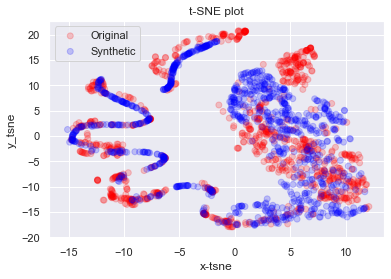

In [0]:
# t-SNE analysis (Code directly taken from the original TimeGAN paper for t-SNE)
tSNE_Analysis (dataX, dataX_hat)

### Save & Read Data

In [0]:
# Save synthetic data into CSV
synt_data  = dataX_hat[0]
for i in range (1,np.shape(dataX_hat)[0]):
    temp = dataX_hat[i]
    synt_data = np.concatenate((synt_data,temp),axis=0)

#Change directory accordingly
np.savetxt('outputs/synt_data/google/google_synt_1k_gru.csv', synt_data, delimiter=',', fmt='%f') 
data_synt = dataX_hat

In [0]:
# Read previously saved CSV file 
data_hat = np.loadtxt('outputs/synt_data/google/google_synt_10k_gru.csv', delimiter = ",") #Choose file
data_synt = []
for i in range(len(data_real)):
    data_synt.append(data_hat[i*seq_length:(i+1)*seq_length,:])
    
data_real = dataX    

### Performance Analysis

Change inputs for data_real and and data_synt variables.

In [0]:
#Parameters
params = dict()
params['data_len'] = len(data_real)
params['data_dim'] = len(data_real[0][0,:])
params['hidden_dim'] = max(round(len(data_real[0][0,:])/2),1)
params['iterations'] = 5000
params['batch_size'] = 128 
params['seq_len'] = seq_length

In [0]:
# Performance Scores (Mean Abs Error)
mae_tstr = train_synt_test_real(data_real, data_synt, params) #trained with synthetic tested with real
mae_trtr = train_real_test_real(data_real, params) #trained and tested with real
print('Mean Absolute Error(Train with Synthetic Test with Real):', mae_tstr)       
print('Mean Absolute Error(Train with Real Test with Real):', mae_trtr)  

Mean Absolute Error(Train with Synthetic Test with Real): 0.04432668261545898
Mean Absolute Error(Train with Real Test with Real): 0.03542700352926934
